# Visualizing Fires with Socieconomic Data 
### Author: Isabella Segarra 
[Github repository](https://github.com/IsabellaSegarra/eaton-palisades-fires-impacts)

### Objective:

### About the data:

#### Fire Perimeter Data 
[Fire permimeter data](https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about) is from the county of Los Angeles via ArcGIS.  

#### EJI Data
[Environmental Justice Index](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html) data is a geodatabase from the CDC/ATSDR ranks U.S. census tracts. 
### Analysis:
In this analysis, I will perform the following: 
1. Spatial join of EJI data to fire perimeters.
2. Clip EJI data to match fire perimeters. 
3. Map EJI data to fire perimeters. 


### 1. Import libraries
In this section I will import the necessary packages for data wrangling and visualizing. 

In [3]:
# Environment set-up 
import pandas as pd # for data wrangling
import numpy as np  # for data wrangling 
import geopandas as gpd # for geospatial data 
import os # for data import
import matplotlib.pyplot as plt  # for visualizations 
import xarray as xr # for Netcdf4 data 
import rioxarray as rio # for xarray data 

### 2. Import Data
In this section I will import the EJI data and fire perimeter data.

In [4]:
# Import EJI data 
# Define file path
fp_eji = os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb')
# Open up file with gpd
eji_ca = gpd.read_file(fp_eji) 

In [5]:
# Import fire perimeter data
# Eaton fire >>>
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121') # use 'os' to specify file path 
eaton_perim = gpd.read_file(fp_eaton) # use 'gpd' to read in geospatial data with geopandas 
# Palisades fire >>>
fp_palisades = os.path.join('data','Palisades_Perimeter_20250121') # use 'os' to specify file path 
palisades_perim = gpd.read_file(fp_palisades) # use 'gpd' to read in geospatial data with geopandas

### 3. Data Exploration
In this section I will explore the EJI and fire perimeter data. I will perform the following:
- View the first few rows of the EJI dataset
- View the geometry type of EJI
- View the CRS of EJI 

In [6]:
# View the first rows of EJI data
eji_ca.head(3)

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,...,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,...,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,California,CA,...,132.0,2.2,0.0,0.0,0.0,-999,-999,8576.416378,4.345421e+06,"MULTIPOLYGON (((-2169306.156 358323.611, -2169..."


In [7]:
# Print the geometry type
print('Geometry type:', eji_ca.geometry)
# Print the CRS
print('CRS:', eji_ca.crs)

Geometry type: 0       MULTIPOLYGON (((-2178538.439 328974.247, -2178...
1       MULTIPOLYGON (((-2174646.947 350500.600, -2174...
2       MULTIPOLYGON (((-2169306.156 358323.611, -2169...
3       MULTIPOLYGON (((-2174819.146 325432.172, -2174...
4       MULTIPOLYGON (((-2172633.856 343802.277, -2172...
                              ...                        
9104    MULTIPOLYGON (((-2177828.012 422742.298, -2177...
9105    MULTIPOLYGON (((-2161322.540 426588.201, -2161...
9106    MULTIPOLYGON (((-2166502.396 376062.485, -2166...
9107    MULTIPOLYGON (((-2225414.535 359337.491, -2225...
9108    MULTIPOLYGON (((-2235440.736 364381.173, -2235...
Name: geometry, Length: 9109, dtype: geometry
CRS: PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]

## Spatial Joining
In order to view the socieconomic effects of the Palisades and Eaton fires, we need to join the fire perimeters with the EJI data. This is achieved through the process of *spatial joining*. 

Spatial join combines attributes from two dfs based on a spatial relationship (intersects). 

In order to join spatially join the EJI data with the fire perimeters, the CRS of both need to match. I can specify this within the `gpd.sjoin()` argument. 

In [8]:
# Spatially join EJI with Palisades fire perimeters
pali_eji = gpd.sjoin(eji_ca.to_crs(palisades_perim.crs),palisades_perim) 

Now I will view the spatial join. 

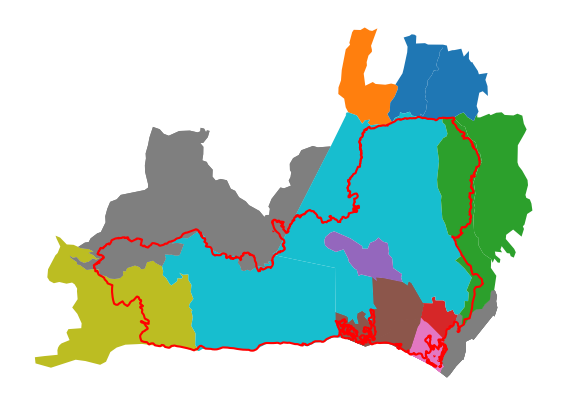

In [9]:
# Exploratory graph: Palisades EJI spatial join
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 

pali_eji.plot('TRACTCE', # plot census tract from spatial join
              ax = ax)
# Add palisades perimeter 
palisades_perim.plot(ax = ax, 
                     color = 'none', 
                     edgecolor = 'red', 
                     linewidth= 1.5)

ax.set_title('')
plt.show() 

In [10]:
# Spatially join EJI with Eaton fire perimeters
eaton_eji = gpd.sjoin(eji_ca.to_crs(eaton_perim.crs),eaton_perim) 

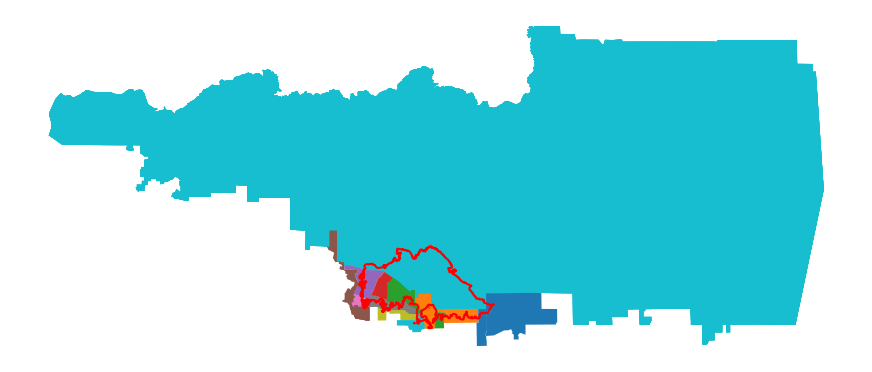

In [11]:
# Exploratory graph: Eaton EJI spatial join
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 

eaton_eji.plot('TRACTCE', # plot census tract from spatial join
              ax = ax)
# Add eaton perimeter 
eaton_perim.plot(ax = ax, 
                     color = 'none', 
                     edgecolor = 'red', 
                     linewidth= 1.5)

ax.set_title('')
plt.show() 

You may notice that the *spatial join* product includes the full expanse census tracts (from EJI data) beyond the fire perimeters. This is because spatial joins will combines attributes from one layer to another. 


## Polygon clipping
In order to fit the census tracts within the fire perimeters, I will perform *polygon clipping* with `gpd.clip()`. Clipping removes all features that fall outside a specified boundary, effectively trimming one dataset with another. 

### CRS Matching

In [12]:
# Change the CRS EJI to match palisades 
eji_ca = eji_ca.to_crs(palisades_perim.crs)

In [13]:
# Clip eji to palisades
palisades_clip = gpd.clip(eji_ca, palisades_perim)

In [14]:
# Clip eji to eaton
eaton_clip = gpd.clip(eji_ca, eaton_perim)

Now I will view the clipping result.

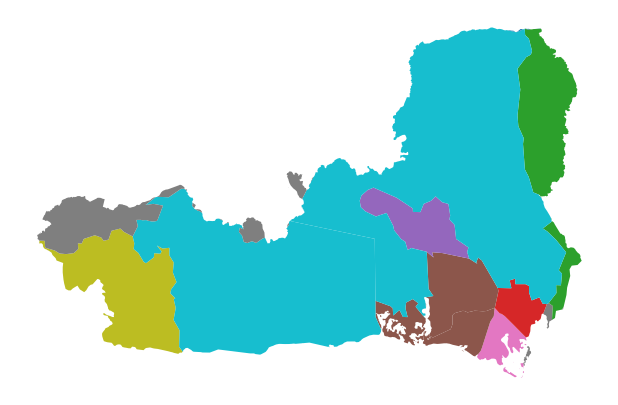

In [15]:
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 
palisades_clip.plot('TRACTCE', 
                    ax = ax )
plt.show()

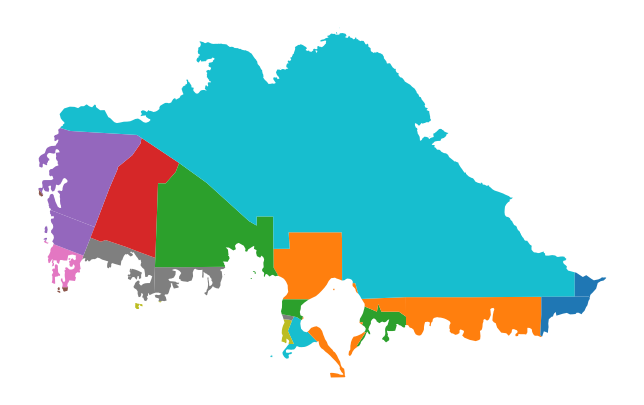

In [16]:
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 
eaton_clip.plot('TRACTCE', 
                    ax = ax )
plt.show()


## Map EJI data to fire perimeters
In this section I will map the EJI variable `E_AGE65` (Percentile rank of the percentage of persons aged 65 and older) to the fire perimeters. 

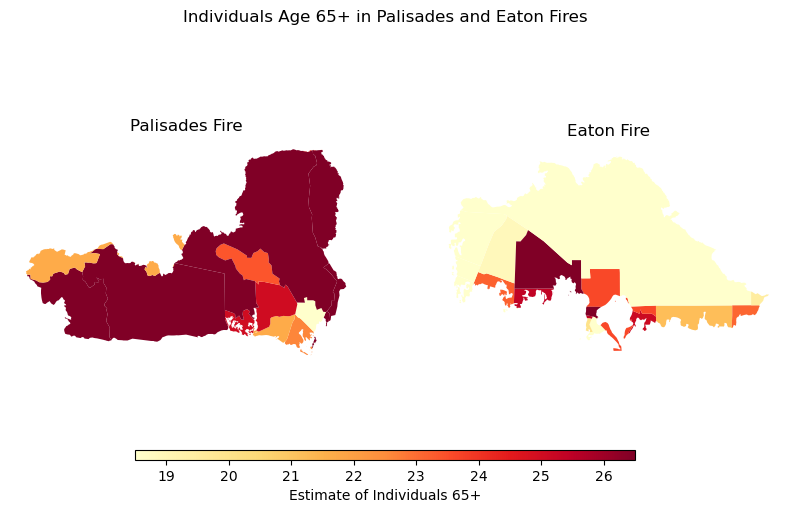

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Define EJI variable
eji_variable = 'E_AGE65'

# Find common min/max for legend range
vmin = min(palisades_clip[eji_variable].min(), palisades_clip[eji_variable].min())
vmax = max(eaton_clip[eji_variable].max(), eaton_clip[eji_variable].max())

# Adjust color
cmap = "YlOrRd"

# Plot census tracts within Palisades perimeter
palisades_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    cmap = cmap,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    cmap = cmap,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Individuals Age 65+ in Palisades and Eaton Fires')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(cmap = cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Estimate of Individuals 65+')

plt.show()